## **Understanding Binary Representation, `binary64`, and `float64` in IEEE 754**

### **Binary Representation: Basics**
In **binary representation**, numbers are expressed using only **0s and 1s**. Each bit represents a **power of 2**, similar to how decimal numbers use powers of 10.

For example, the binary number **`1011`** represents:

$$
(1 \times 2^3) + (0 \times 2^2) + (1 \times 2^1) + (1 \times 2^0) = 8 + 0 + 2 + 1 = 11
$$

In computers, numbers are stored in binary using **fixed sizes** (e.g., 32-bit called single precision, or 64-bit floating point called double precision).

---

### **What is `binary64` / `float64`?**
The **IEEE 754 `binary64` format**, also known as `float64`, is the **64-bit** representation of floating-point numbers. It consists of:

| **Component**  | **Bits** | **Description** |
|--------------|------|-------------------------|
| **Sign** | 1 | Determines if the number is positive (0) or negative (1) |
| **Exponent** | 11 | Stores the exponent with a **bias of 1023** |
| **Mantissa (Fraction)** | 52 | Stores the **significant digits (mantissa)** of the number |

A floating-point number is represented as:

$$
(-1)^{\text{sign}} \times 1.\text{mantissa} \times 2^{(\text{exponent} - 1023)}
$$

---

### **Special Values in `binary64`**
IEEE 754 defines several special floating-point values:

| **Type** | **Sign Bit** | **Exponent** | **Mantissa** | **Value** |
|----------|----------|----------|----------|-------------------|
| **Zero** | 0 / 1 | `00000000000` | `000000000000...` | $+0.0$, $-0.0$ |
| **Normalized Numbers** | 0 / 1 | `00000000001` to `11111111110` | any | Standard floating points |
| **Infinity** | 0 / 1 | `11111111111` | `000000000000...` | $+\infty$, $-\infty$ |
| **NaN (Not a Number)** | 0 / 1 | `11111111111` | nonzero | Indeterminate results |

🔹 **Infinity (`inf`)** appears when a calculation exceeds the largest possible float (`float64.max`).  
🔹 **NaN (Not-a-Number)** results from **undefined operations**, e.g., `0/0` or `sqrt(-1)`.

---

### **Machine Epsilon $\epsilon_{machine}$**
**Machine epsilon ($\epsilon_{machine}$)** is the smallest number **that can be added to 1 and still be distinguishable** in floating-point arithmetic.

For `binary64`:

$$
\epsilon_{\text{machine}} = 2^{-52} \approx 2.22045 \times 10^{-16}
$$

This means that **any number smaller than $\epsilon_{machine}$ added to 1 will not change the result** due to precision limits.

---

### **Min & Max Float Values**
| **Property** | **Formula** | **Value** |
|-------------|------------|-----------|
| **Smallest positive normal float** | $2^{-1022}$ | $2.225 \times 10^{-308}$ |
| **Largest float** | $ (2 - 2^{-52}) \times 2^{1023} $ | $1.798 \times 10^{308}$ |



---

### **Rounding Errors & Floating-Point Precision**
Floating-point arithmetic is **not exact** because some numbers **cannot be represented perfectly** in binary.

#### **Common Issues:**
1. **Precision Loss**: Some decimals (e.g., `0.1`) do not have exact binary representations.
   - Example: $0.1_{10} = 0.0001100110011..._2$ (repeating in binary)
2. **Accumulation Error**: Small rounding errors add up in long calculations.
3. **Catastrophic Cancellation**: Subtracting nearly equal numbers can cause significant loss of precision.



In [2]:
# This section implement conversion and visualization of IEEE 754 binary64 (double precision) floating-point numbers.

import struct
import matplotlib.pyplot as plt

def float_to_binary64(num):
    """
    Convert a float to its IEEE 754 binary64 (double precision) representation.
    """
    packed = struct.pack('>d', num)  # Pack as big-endian double
    binary_str = ''.join(f'{byte:08b}' for byte in packed)  # Convert bytes to binary string
    
    # Extract components
    sign = binary_str[0]
    exponent = binary_str[1:12]
    mantissa = binary_str[12:]
    
    return f"{sign} | {exponent} | {mantissa}", binary_str

def binary64_to_float(binary_str):
    """
    Convert a binary64 string back to a floating-point number.
    """
    clean_binary_str = binary_str.replace(" | ", "")
    if len(clean_binary_str) != 64:
        raise ValueError("Binary string must be exactly 64 bits long")
    
    # Convert binary to bytes
    byte_array = bytes(int(clean_binary_str[i:i+8], 2) for i in range(0, 64, 8))
    
    # Unpack as double precision float
    return struct.unpack('>d', byte_array)[0]

def visualize_binary64(binary_str):
    """
    Visualize the binary64 representation of a floating-point number.
    """
    sign, exponent, mantissa = binary_str.split(" | ")
    segments = [sign, exponent, mantissa]
    labels = ["S (1 bit)", "E (11 bits)", "M (52 bits)"]
    colors = ["red", "blue", "green"]
    
    fig, ax = plt.subplots(figsize=(12, 3))
    start = 0
    for label, segment, color in zip(labels, segments, colors):
        ax.text(start + len(segment) / 2, 0.5, segment, fontsize=12, ha="center", va="center", color="white",
                bbox=dict(facecolor=color, edgecolor="black", boxstyle="round,pad=0.3"))
        ax.text(start + len(segment) / 2, 1.2, label, fontsize=14, ha="center", va="center", color="black", fontweight="bold")
        start += len(segment) + 3  # Account for separator spacing
    
    ax.set_xlim(0, 64 + 6)  # Extra space for separators
    ax.set_ylim(0, 1.5)
    ax.axis("off")
    ax.set_title("IEEE 754 Binary64 Representation", fontsize=16)
    plt.show()




### **You can test here how numbers are converted from decimal to binary64 and viceversa**

### Enter num in scientific notation to obtain the binary 64 representation

Binary representation of 2e-20: 0 | 01110111101 | 0111100111001010000100001100100100100100001000100011



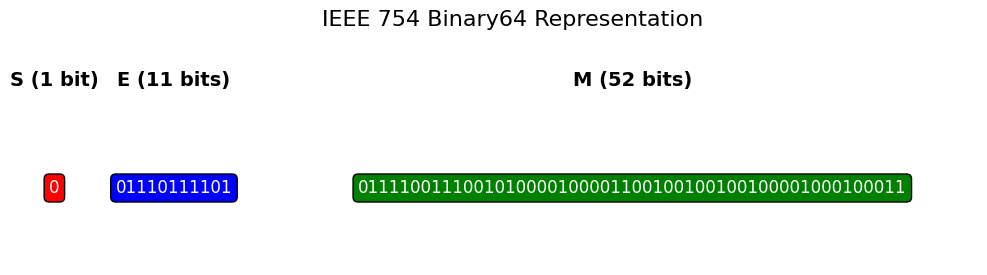

In [6]:
# Binary64 representation of a decimal number

##### Enter num in scientific notation to obtain the binary 64 representation
num = 2e-20



binary_representation, binary_str_clean = float_to_binary64(num)
print(f"Binary representation of {num}: {binary_representation}\n")
visualize_binary64(binary_representation)



$$
x = (-1)^S \times M  \times 2^E
$$

### Enter a string of 64 bits (in binary64 format) to obtain the decinal representation in scientific notation


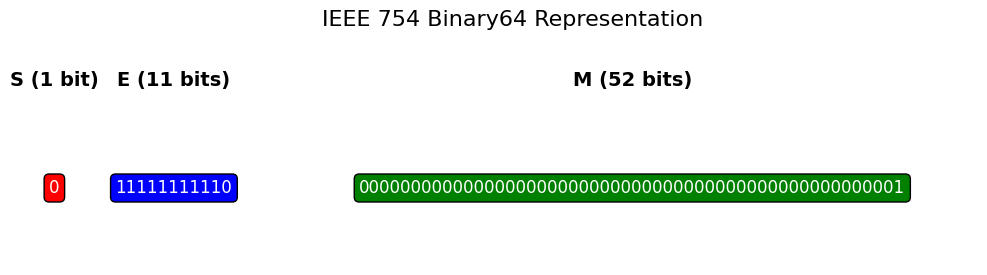

Decinal representation of binary64 0 | 11111111110 | 0000000000000000000000000000000000000000000000000001: 8.988465674311582e+307


In [11]:
##### Enter a string of 64 bits (in binary64 format) to obtain the decinal representation in scientific notation

# Example binary64 string conversions

binary_representation = "0 | 11111111110 | 0000000000000000000000000000000000000000000000000001"

converted_float = binary64_to_float(binary_representation)
visualize_binary64(binary_representation)
print(f"Decinal representation of binary64 {binary_representation}: {converted_float}")


$$
x = (-1)^S \times M  \times 2^E
$$

### **There are minor differences between native python and nompy for `binary64`**

Test this checking the min, max and eps in the native python and numpy 

In [12]:
import numpy as np
import sys

### Native python min, max and epsilon

print('native python min', sys.float_info.min)
print('native python max', sys.float_info.max)
print('native python epsilon', sys.float_info.epsilon)

### Numpy min, max and epsilon

print('numpy min:',np.finfo(np.float64).min)  
print('numpy max:',np.finfo(np.float64).max)  
print('numpy epsilon:',np.finfo(np.float64).eps)

native python min 2.2250738585072014e-308
native python max 1.7976931348623157e+308
native python epsilon 2.220446049250313e-16
numpy min: -1.7976931348623157e+308
numpy max: 1.7976931348623157e+308
numpy epsilon: 2.220446049250313e-16


In [13]:
# Test the smallest distinguishable increment from 1.0
import sys
python_epsilon = sys.float_info.epsilon
test_value = 0.3 + python_epsilon 
difference = test_value - 0.3
print(f"Machine epsilon (Python float64): {python_epsilon}")
print(f"Difference (1.0 + epsilon - 1.0): {difference}")

Machine epsilon (Python float64): 2.220446049250313e-16
Difference (1.0 + epsilon - 1.0): 2.220446049250313e-16


### **Examples of rounding errors** 
You can check this on numbers that have a periodic notation in binary 

In [11]:
x = 0.1
sum_x = sum([x] * 10)  # Adding 0.1 ten times
print(sum_x)

0.9999999999999999


In [12]:
print(0.1 + 0.2)

0.30000000000000004
